In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [10]:
meas_first=session.query(Measurement).first()
meas_first.__dict__.keys()

dict_keys(['_sa_instance_state', 'prcp', 'station', 'tobs', 'date', 'id'])

# Exploratory Climate Analysis

In [11]:
# Calculate the date 1 year ago from the last data point in the database
# find latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
last_year=session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_meas=pd.DataFrame(last_year)
year_meas.rename(columns={'date':'Date','station':'Station','prcp':'Precipitation'}, inplace=True)

In [14]:
year_meas=year_meas.set_index('Date')
year_meas.head()

,Station,Precipitation
Date,,
2016-08-24,USC00519397,0.08
2016-08-24,USC00513117,2.15
2016-08-24,USC00514830,2.28
2016-08-24,USC00517948,NaN
2016-08-24,USC00519523,1.22


In [15]:
# Sort the dataframe by date
year_meas = year_meas.sort_index()

In [54]:
# reset index so we can use date in the plot
reset_yearmeas=year_meas.reset_index()
reset_yearmeas.head()

,Date,Station,Precipitation
0,2016-08-24,USC00519397,0.08
1,2016-08-24,USC00513117,2.15
2,2016-08-24,USC00514830,2.28
3,2016-08-24,USC00517948,NaN
4,2016-08-24,USC00519523,1.22


Text(0, 0.5, 'Inches')

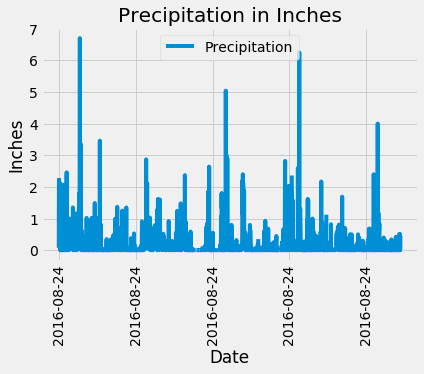

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data
plotted_yearmeas=reset_yearmeas.plot(title='Precipitation in Inches')
plotted_yearmeas.set_xlabel('Date')
plotted_yearmeas.set_xticklabels(labels=reset_yearmeas['Date'],rotation=90)
plotted_yearmeas.set_ylabel('Inches')

In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
stat_summary = pd.DataFrame(reset_yearmeas.describe())
stat_summary

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

## using Measurement data

In [30]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement).group_by(Measurement.station).count()
station_count

9

In [31]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# for all data available
station_count = pd.DataFrame(session.query(Measurement.station, Measurement.date, \
                                           Measurement.prcp, Measurement.tobs).order_by(Measurement.station, Measurement.date))
total_stations = station_count.groupby('station').count()
total_stations = total_stations.sort_values('date', ascending=False)
total_stations

,date,prcp,tobs
station,,,
USC00519281,2772,2772,2772
USC00519397,2724,2685,2724
USC00513117,2709,2696,2709
USC00519523,2669,2572,2669
USC00516128,2612,2484,2612
USC00514830,2202,1937,2202
USC00511918,1979,1932,1979
USC00517948,1372,683,1372
USC00518838,511,342,511


In [33]:
# number of stations specifically used in the last year of available data
stations_year = year_meas.groupby('Station').count()
stations_year = stations_year.reset_index()
stations_year

,Station,Precipitation
0,USC00513117,342
1,USC00514830,264
2,USC00516128,327
3,USC00517948,60
4,USC00519281,351
5,USC00519397,358
6,USC00519523,313


In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# specifically for the last year
stations_year = stations_year.sort_values('Precipitation', ascending=False)
stations_year

,Station,Precipitation
5,USC00519397,358
4,USC00519281,351
0,USC00513117,342
2,USC00516128,327
6,USC00519523,313
1,USC00514830,264
3,USC00517948,60


In [37]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by(Measurement.tobs).all()
top_station = pd.DataFrame(active_station)
top_station.head()

,station,date,tobs
0,USC00519281,2013-01-16,54.0
1,USC00519281,2015-01-05,56.0
2,USC00519281,2015-02-15,56.0
3,USC00519281,2015-03-13,56.0
4,USC00519281,2016-02-08,56.0


In [42]:
# lowest temp
lowest_temp = top_station['tobs'].min()
print(f'The lowest temperature recorded at Station USC00519281 was {lowest_temp} degrees Fahrenheit.')

The lowest temperature recorded at Station USC00519281 was 54.0 degrees Fahrenheit.


In [44]:
# highest temperature
max_temp = top_station['tobs'].max()
print(f'The highest temperature recorded at Station USC00519281 was {max_temp} degrees Fahrenheit.')

The highest temperature recorded at Station USC00519281 was 85.0 degrees Fahrenheit.


In [47]:
# average temperature
avg_temp = top_station['tobs'].mean()
print(f'The average temperature recorded at Station USC00519281 was {avg_temp:.2f} degrees Fahrenheit.')

The average temperature recorded at Station USC00519281 was 71.66 degrees Fahrenheit.


### Looking at most activate station in the last year of recorded data

In [49]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_year = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()
top_year_df = pd.DataFrame(top_station_year)
top_year_df.head()

,date,station,tobs
0,2016-08-24,USC00519281,77.0
1,2016-08-25,USC00519281,80.0
2,2016-08-26,USC00519281,80.0
3,2016-08-27,USC00519281,75.0
4,2016-08-28,USC00519281,73.0


AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

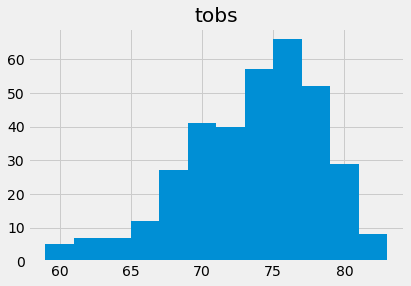

In [53]:
top_year_hist = plt.hist(top_year_df['tobs'], top_year_df['bins=12)
top_year_hist.set_xlabel('Temperature (Fahrenheit)')
#top_year_hist.set_ylabel('Frequency')
#top_year_hist.set_title('Temperature Occurence Between 8/2016 and 8/2017')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
